# Assignment 1 - Neural Networks for Handwritten Digit Recognition, Multiclass

## 1 Packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

## 2 ReLU Activation

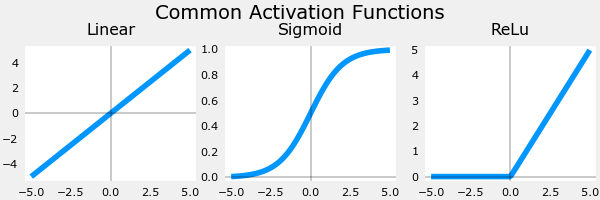

In [2]:
plt_act_trio()

## 3 Softmax Function

### <span style="color:red"> Exercise 1 </span>

In [3]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    ez=np.exp(z)
    z=ez/np.sum(ez)
    return(z)    

In [4]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [5]:
test_my_softmax(my_softmax)

 All tests passed.


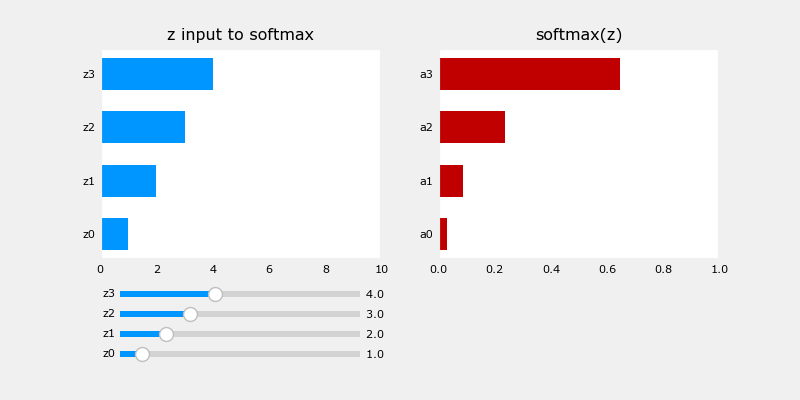

In [6]:
plt.close("all")
plt_softmax(my_softmax)

## 4 Neural Networks

### 4.1 Problem Statement

### 4.2 Dataset

In [8]:
X,y=load_data()

In [9]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

In [11]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [12]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [13]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '1')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '2')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '4')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '4')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '0')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '8')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '4')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '8')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '2')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '1')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '0')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '0')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '4')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '0')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '1')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '2')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '0')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '0')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '8')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '4')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '1')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '2')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '4')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '8')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '9')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '7')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '4')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '6')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '9')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '1')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '9')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '8')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '2')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '9')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '9')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '3')

Text(0.5, 0.98, 'Label, image')

Text(0.5, 1.0, '5')

Text(0.5, 0.98, 'Label, image')

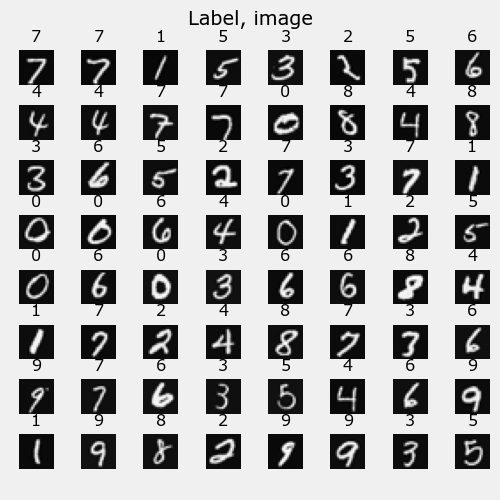

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

### 4.3 Model representation

### 4.4 Tensorflow Model Implementation

### 4.5 Softmax placement

### <span style="color:red">Exercise 2</span>

In [17]:
tf.random.set_seed(1234)
model= Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25,activation="relu",name="L1"),
        tf.keras.layers.Dense(15,activation="relu",name="L2"),
        tf.keras.layers.Dense(10,activation="linear",name="L3")
    ], name="my_model"
)

In [18]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [19]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
test_model(model,10,400)

ValueError: The layer my_model has never been called and thus has no defined input.

In [21]:
[layer1, layer2, layer3] = model.layers

In [22]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [34]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=200
)

Epoch 1/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - loss: 0.0271
Epoch 2/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.0228
Epoch 3/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0211
Epoch 4/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0191
Epoch 5/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.0173
Epoch 6/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.0158
Epoch 7/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0139
Epoch 8/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0127
Epoch 9/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0116
Epoch 10/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104
Epoch 11/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094
Epoch 12/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087
Epoch 13/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079
Epoch 14/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072
Epoch 15/200
157/157 ━━━━━━━━

In [24]:
history

In [35]:
history.history

{'loss': [0.02565605193376541,
  0.02239825762808323,
  0.02056819759309292,
  0.0185491144657135,
  0.016950199380517006,
  0.015316846780478954,
  0.013749964535236359,
  0.012519994750618935,
  0.011405646800994873,
  0.010341702960431576,
  0.009308465756475925,
  0.008628720417618752,
  0.007707578130066395,
  0.007077905349433422,
  0.0065007987432181835,
  0.00600896030664444,
  0.005448711570352316,
  0.005031593143939972,
  0.004596420098096132,
  0.004200218245387077,
  0.007765218149870634,
  0.0059237489476799965,
  0.005420131143182516,
  0.004550396930426359,
  0.004981083329766989,
  0.016601094976067543,
  0.008028973825275898,
  0.0035586394369602203,
  0.00255758548155427,
  0.002043654676526785,
  0.0018013475928455591,
  0.0016537579940631986,
  0.0015367064625024796,
  0.0014316969318315387,
  0.0013400526950135827,
  0.0012611023848876357,
  0.0011859512887895107,
  0.0011216910788789392,
  0.0010583229595795274,
  0.0010016479063779116,
  0.0009495139820501208,
 

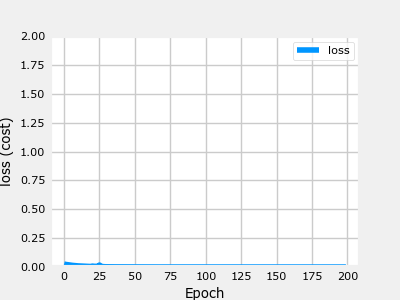

In [36]:
plot_loss_tf(history)

In [28]:
image_of_two=X[1015]
image_of_two
y[1015]

array([ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, 

array([2], dtype=uint8)

In [37]:
prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
 predicting a Two: 
[[-53.08  -4.97  16.47  -1.34 -62.63 -36.38 -23.88  -9.73 -42.05 -57.81]]
 Largest Prediction index: 2


In [38]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[6.24e-31 4.89e-10 1.00e+00 1.84e-08 4.43e-35 1.11e-23 2.99e-18 4.18e-12
  3.85e-26 5.52e-33]]
Total of predictions: 1.000


In [39]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0.5, 1.0, '7,7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Text(0.5, 1.0, '2,2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Text(0.5, 1.0, '0,0')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Text(0.5, 1.0, '4,4')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Text(0.5, 1.0, '9,9')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Text(0.5, 1.0, '9,9')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Text(0.5, 1.0, '2,2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Text(0.5, 1.0, '1,1')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Text(0.5, 1.0, '0,0')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Text(0.5, 1.0, '2,2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Text(0.5, 1.0, '6,6')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Text(0.5, 1.0, '4,4')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Text(0.5, 1.0, '4,4')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Text(0.5, 1.0, '9,9')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Text(0.5, 1.0, '7,7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Text(0.5, 1.0, '7,7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Text(0.5, 1.0, '9,9')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Text(0.5, 1.0, '1,1')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Text(0.5, 1.0, '7,7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0.5, 1.0, '7,7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Text(0.5, 1.0, '1,1')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Text(0.5, 1.0, '3,3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Text(0.5, 1.0, '4,4')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Text(0.5, 1.0, '9,9')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Text(0.5, 1.0, '6,6')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Text(0.5, 1.0, '3,3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Text(0.5, 1.0, '0,0')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Text(0.5, 1.0, '2,2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Text(0.5, 1.0, '0,0')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Text(0.5, 1.0, '3,3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Text(0.5, 1.0, '6,6')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Text(0.5, 1.0, '8,8')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Text(0.5, 1.0, '7,7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Text(0.5, 1.0, '7,7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Text(0.5, 1.0, '4,4')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Text(0.5, 1.0, '2,2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Text(0.5, 1.0, '4,4')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Text(0.5, 1.0, '8,8')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Text(0.5, 1.0, '3,3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Text(0.5, 1.0, '9,9')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Text(0.5, 1.0, '2,2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0.5, 1.0, '2,2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Text(0.5, 1.0, '0,0')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Text(0.5, 1.0, '8,8')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Text(0.5, 1.0, '0,0')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Text(0.5, 1.0, '2,2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Text(0.5, 1.0, '7,7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Text(0.5, 1.0, '5,5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Text(0.5, 1.0, '8,8')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Text(0.5, 1.0, '2,2')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Text(0.5, 1.0, '3,3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Text(0.5, 1.0, '9,9')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Text(0.5, 1.0, '7,7')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Text(0.5, 1.0, '5,5')

Text(0.5, 0.98, 'Label, yhat')

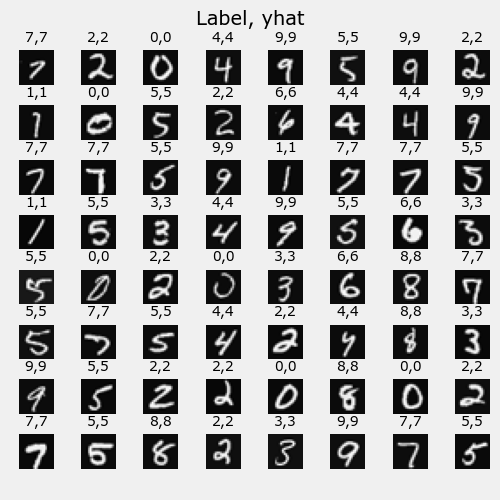

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [41]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
no errors found
0 errors out of 5000 images
